## Расчет издержек на авиарейсы из аэропорта Анапы

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('result_project_query_all_flights.csv')

Как я помню, из базы получилось, что авиакомпания зимой обслуживает 3 рейса, но только 2 пассажирских. Возмем для анализа только их. Это полеты в SVO и EGO.

In [32]:
data = df.copy()
data = data[data['arrival_airport'].isin(['SVO', 'EGO'])]

In [33]:
data['actual_arrival'] = pd.to_datetime(data['actual_arrival'], format="%Y/%m/%d %H:%M:%S")
data['actual_departure'] = pd.to_datetime(data['actual_departure'], format="%Y/%m/%d %H:%M:%S")

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 192
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   flight_id            180 non-null    int64              
 1   arrival_airport      180 non-null    object             
 2   actual_departure     180 non-null    datetime64[ns, UTC]
 3   actual_arrival       180 non-null    datetime64[ns, UTC]
 4   aircraft_model       180 non-null    object             
 5   seats_per_craft      180 non-null    int64              
 6   fuel_consumption     180 non-null    float64            
 7   fuel_price_by_month  180 non-null    int64              
 8   flight_income        180 non-null    float64            
 9   sold_tickets         180 non-null    int64              
 10  flight_cost          180 non-null    int64              
 11  pnl                  180 non-null    float64            
 12  rn                   1

### График заполненности рейса в EGO (аэропорте Белгород)

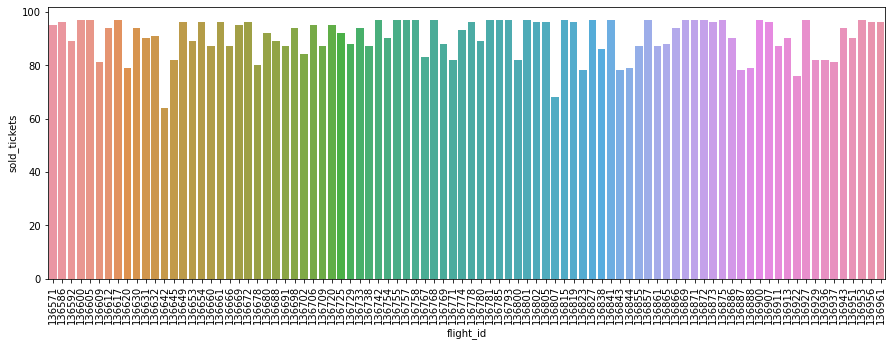

In [43]:
plt.rcParams['figure.figsize'] = (15,5)
plt.xticks(rotation=90)
sns.barplot(x='flight_id', y='sold_tickets', data=data[data['arrival_airport'].isin(['EGO'])])
plt.show()

### График заполненности рейса в SVO (Шереметьево)

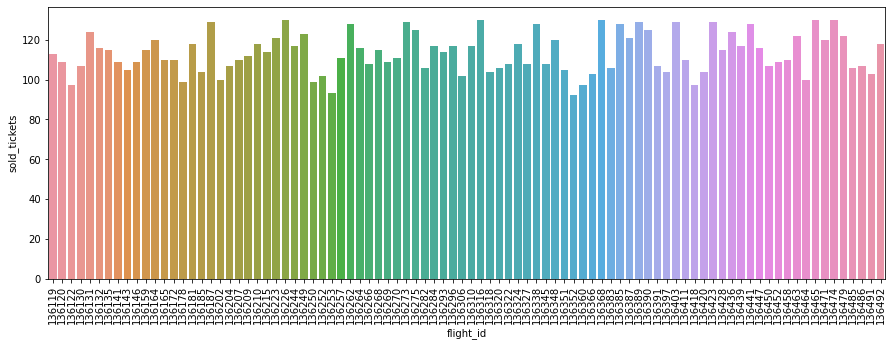

In [44]:
plt.rcParams['figure.figsize'] = (15,5)
plt.xticks(rotation=90)
sns.barplot(x='flight_id', y='sold_tickets', data=data[data['arrival_airport'].isin(['SVO'])])
plt.show()

In [46]:
data['aircraft_model'].unique()

array(['Sukhoi Superjet-100', 'Boeing 737-300'], dtype=object)

Итак, из базы я получил данные по рейсам за декабрь 2016 года и январь-февраль 2017 года (зима 2017). И сразу в запросе я учел затраты на топливо. Но это только малая часть затрат из которых складывается общая сумма.
Что ещё можно включить в затраты каждого полета:
- сбор аэропорта за взлет-посадку - 412 рублей за тонну (включая 3 часа стоянки)
- сбор за обеспечение авиационной безопасности - 317 рублей за тонну
- сбор за предоставление аэровокзального комплекса - 66 рублей за пассажира
- тариф за обслуживание пассажиров - 165 рублей за пассажира
- питание на борту - допустим его не включают в билет (рейс короткий)
- различные сборы и тарифы (использоватени ВИП зала, вывоз мусора с самолета, сан узлов и т.д.) - 60000

In [47]:
aircrafts_mass_dict = {'Sukhoi Superjet-100': 25.83, 'Boeing 737-300': 45.36}

In [48]:
data['aircraft_mass'] = data['aircraft_model'].map(aircrafts_mass_dict)

In [49]:
data['airport_costs'] = data['flight_cost'] + data['sold_tickets'] * (66 + 165) + data['aircraft_mass'] * (412 + 317) + 60000

In [50]:
data.sort_values(by=['arrival_airport', 'airport_costs'])

,flight_id,arrival_airport,actual_departure,actual_arrival,aircraft_model,seats_per_craft,fuel_consumption,fuel_price_by_month,flight_income,sold_tickets,flight_cost,pnl,rn,flight_occupancy,aircraft_mass,airport_costs
1,136807,EGO,2017-02-23 09:28:00+00:00,2017-02-23 10:18:00+00:00,Sukhoi Superjet-100,97,1.7,39553,531000.0,68,56033,474967.0,2,70,25.83,150571.07
0,136642,EGO,2017-01-30 09:28:00+00:00,2017-01-30 10:17:00+00:00,Sukhoi Superjet-100,97,1.7,41435,531000.0,64,57526,473474.0,1,65,25.83,151140.07
17,136771,EGO,2016-12-17 09:26:00+00:00,2016-12-17 10:15:00+00:00,Sukhoi Superjet-100,97,1.7,38867,657000.0,82,53960,603040.0,18,84,25.83,151732.07
13,136843,EGO,2016-12-04 09:30:00+00:00,2016-12-04 10:20:00+00:00,Sukhoi Superjet-100,97,1.7,38867,632400.0,78,55062,577338.0,14,80,25.83,151910.07
5,136620,EGO,2017-02-17 09:30:00+00:00,2017-02-17 10:19:00+00:00,Sukhoi Superjet-100,97,1.7,39553,613500.0,79,54913,558587.0,6,81,25.83,151992.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,136316,SVO,2017-01-12 10:07:00+00:00,2017-01-12 11:47:00+00:00,Boeing 737-300,130,7.8,41435,1886000.0,130,538655,1347345.0,81,100,45.36,661752.44
146,136119,SVO,2017-01-03 10:08:00+00:00,2017-01-03 11:49:00+00:00,Boeing 737-300,130,7.8,41435,1653000.0,113,544042,1108958.0,44,86,45.36,663212.44
115,136202,SVO,2017-01-05 10:07:00+00:00,2017-01-05 11:49:00+00:00,Boeing 737-300,130,7.8,41435,1495600.0,100,549428,946172.0,13,76,45.36,665595.44
114,136383,SVO,2017-01-25 10:09:00+00:00,2017-01-25 11:51:00+00:00,Boeing 737-300,130,7.8,41435,1493200.0,106,549428,943772.0,12,81,45.36,666981.44


Посмотрим, какие у нас самолеты на линиях и сколько полетов они совершили

In [51]:
data['aircraft_model'].value_counts()

Boeing 737-300         90
Sukhoi Superjet-100    90
Name: aircraft_model, dtype: int64

Сделаю разбивку по месяцам

In [52]:
flights_count_dict = data.groupby([data['actual_departure'].dt.month, 'aircraft_model'])['aircraft_model'].count().to_dict()

In [53]:
flights_count_dict

{(1, 'Boeing 737-300'): 31,
 (1, 'Sukhoi Superjet-100'): 31,
 (2, 'Boeing 737-300'): 28,
 (2, 'Sukhoi Superjet-100'): 28,
 (12, 'Boeing 737-300'): 31,
 (12, 'Sukhoi Superjet-100'): 31}

Далее, предположу, что самолеты в лизинге.
Буду считать очень упрощенно, у меня нет точных данных.
Лизинг Sukhoi Superjet-100 стоит 8000000 рублей в месяц. Boeing 737-300 - предположим, что столько же.
Ещё к лизингу сразу приплюсую ТОиР. 3000000 в месяц за самолет

In [54]:
lising_payment_by_month = 11000000

Отнесем лизинг на каждый полет. Сделаем предположение, что полеты были туда-обратно. Поэтому ежемесячную плату за лизинг я буду делить на удвоенное количество рейсов.

In [55]:
data['lising_by_month'] = data[['actual_departure', 'aircraft_model']].apply(lambda x: lising_payment_by_month / 
                                                                             (2 * flights_count_dict[(x[0].month, x[1])]), 
                                                                             axis=1)

Теперь нужно учесть хотя бы примерно расход на летный персонал.
Первый и второй пилоты пусть получают равные ЗП - 300000 руб/месяц
Бортпроводники - 75000 - на борту их у нас - 5 человек
Итого в месяц оплата за персонал одного самолета - 957000

In [56]:
crew_earning_by_month = 975000

In [57]:
data['crew_earning'] = data[['actual_departure', 'aircraft_model']].apply(lambda x: crew_earning_by_month / 
                                                                          (2 * flights_count_dict[(x[0].month, x[1])]), 
                                                                          axis=1)

In [58]:
data['pnl2'] = data['flight_income'] - (data['airport_costs'].astype(int) + data['lising_by_month'].astype(int) + data['crew_earning'].astype(int))

### График прибыли с рейса в SVO (Шереметьево)

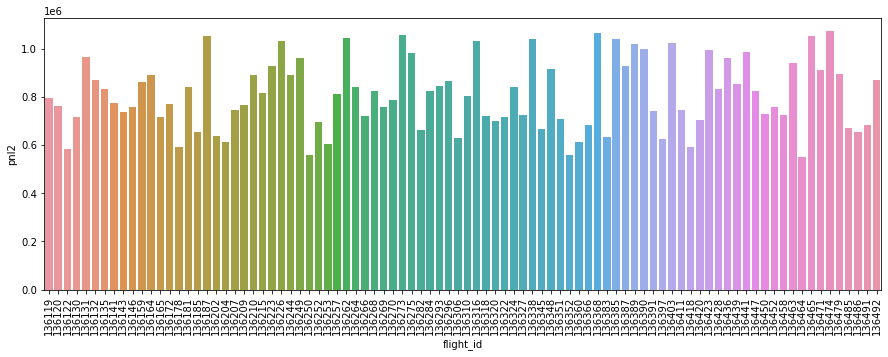

In [60]:
plt.rcParams['figure.figsize'] = (15,5)
plt.xticks(rotation=90)
sns.barplot(x='flight_id', y='pnl2', data=data[data['arrival_airport'].isin(['SVO'])])
plt.show()

In [62]:
data[data['arrival_airport'].isin(['SVO'])][['arrival_airport', 'aircraft_model', 'flight_income', 'pnl2']].sort_values(by=['pnl2']).head(5)

,arrival_airport,aircraft_model,flight_income,pnl2
103,SVO,Boeing 737-300,1398000.0,550034.0
105,SVO,Boeing 737-300,1407800.0,558695.0
104,SVO,Boeing 737-300,1372400.0,559666.0
106,SVO,Boeing 737-300,1431000.0,583727.0
107,SVO,Boeing 737-300,1434600.0,592252.0


### График прибыли с рейса в EGO (аэропорте Белгород)

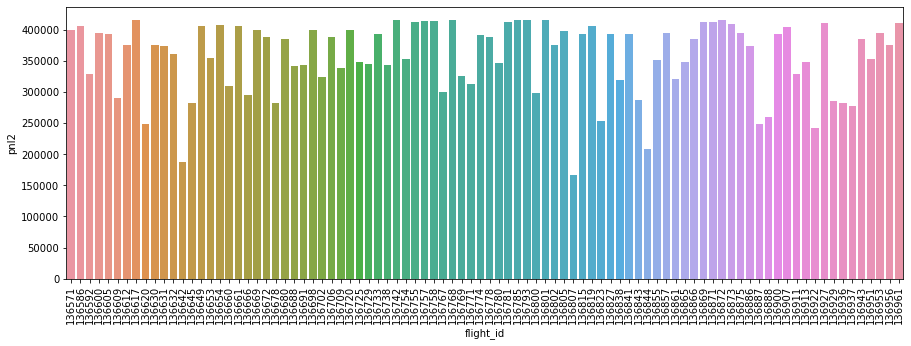

In [63]:
plt.rcParams['figure.figsize'] = (15,5)
plt.xticks(rotation=90)
sns.barplot(x='flight_id', y='pnl2', data=data[data['arrival_airport'].isin(['EGO'])])
plt.show()

In [64]:
data[data['arrival_airport'].isin(['EGO'])][['arrival_airport', 'aircraft_model', 'flight_income', 'pnl2']].sort_values(by=['pnl2']).head(5)

,arrival_airport,aircraft_model,flight_income,pnl2
1,EGO,Sukhoi Superjet-100,531000.0,166591.0
0,EGO,Sukhoi Superjet-100,531000.0,186716.0
2,EGO,Sukhoi Superjet-100,575100.0,208150.0
4,EGO,Sukhoi Superjet-100,607800.0,241543.0
5,EGO,Sukhoi Superjet-100,613500.0,247670.0


## Выводы по этому небольшому анализу.

1. Я, конечно, учел не все затраты авиакомпании. Конечно, есть ещё штат сотрудников офиса. Есть сам офис, затраты которого распределяются по всем рейсам.
2. Я взял только те тарифы и сборы, которые смог найти.
3. Стоимость лизинга я взял на основании данных из интернета. Всё зависит от лизинговой компании и некоторых других факторов.
4. Также я не учёл страховку как самолета, так и экипажа и т.д.
5. Есть ещё маркетинговые затраты и много другого прочего

#### Для полного анализа прибыльности рейса нужно намного больше времени и входных данных.
Но даже по тем цифрам, которые получились, можно сделать вывод, что даже в низкий сезон рейсы приносят хоть небольшую, но прибыль. Если отменять рейсы с самой низкой доходностью, нужно учесть затраты на хранение самолета.
То есть если самолет летает - то приносит хотя бы небольшую прибыль. Если стоит на земле - генерирует только убытки.